<table align="center" width=100% style="color:blue">
    <tr style="background:white">
        <td>
            <div align="center">
                <font color="#fffff" size=24px>
                    <span style="color:red">CREDIT CARD FRAUDLENT DETECTION
                    </span>
                </font>
            </div>
        </td>
    </tr>
</table>

 # Problem Statement-  ****Credit Card Fraud Detection****

In recent years, the increase in online transactions has led to a significant rise in credit card fraud, impacting both consumers and financial institutions. Fraudulent activities not only result in financial losses but also erode customer trust and brand reputation.

The challenge is to develop an effective credit card fraud detection system that can accurately identify and flag fraudulent transactions in real-time, while minimizing false positives that could inconvenience legitimate customers.

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Importing Libraries</span>


In [2]:
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Reading CSV</span>


In [3]:
df_cc = pd.read_csv('creditcard.csv')
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Last 10 lines</span>


In [4]:
df_cc.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Shape</span>


In [5]:
df_cc.shape

(284807, 31)

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>DataType</span>


In [6]:
df_cc.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Columns</span>


In [7]:
df_cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Index</span>


In [8]:
# Check the first few rows of the DataFrame
df_cc = pd.read_csv('creditcard.csv')
print(df_cc.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
# splitting features and the target variable
# consider all the columns except 'number' using 'iloc'
df_features = df_cc.iloc[:, df_cc.columns != 'number']

# consider the target variable
df_target = df_cc.iloc[:, df_cc.columns == 'number']

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Null Values</span>


In [10]:
null_counts = df_cc.isnull().sum
print(null_counts)

<bound method DataFrame.sum of          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        

In [11]:
df_cc.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Pie Chart</span>


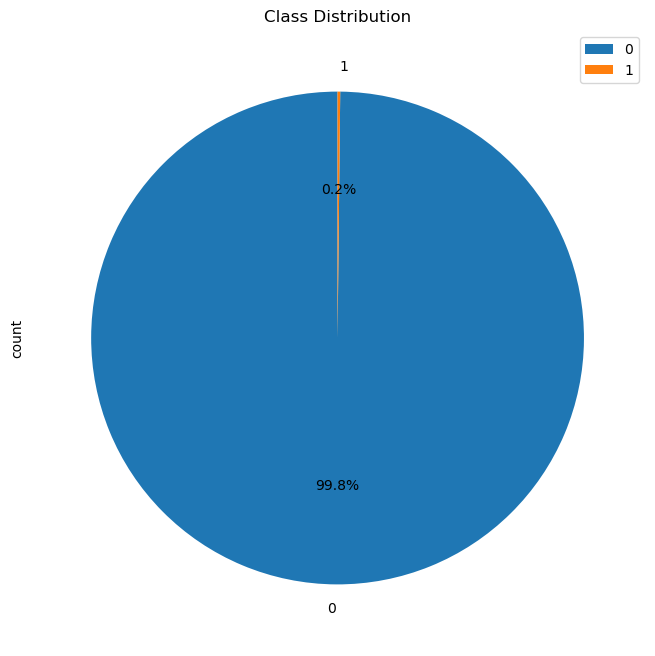

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_cc = pd.read_csv("C:\\Users\\kevin\\Downloads\\creditcard.csv")

# Example: Create a pie chart for the 'Class' column (assuming it represents categories)
class_distribution = df_cc['Class'].value_counts()

# Plot the pie chart
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), legend=True)

# Add a title
plt.title('Class Distribution')

# Display the chart
plt.show()


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Replace NULL values</span>


In [13]:
def handle_missing_values(df):
    for column in df.columns:
        if df[column].isnull().any():  # Check if there are null values
            if df[column].dtype in ['int64', 'float64']:  # Numerical columns
                median_value = df[column].median()
                mean_value = df[column].mean()
                # Replace nulls with median
                df[column].fillna(median_value, inplace=True)
                # Alternatively, to replace with mean, uncomment the next line
                # df[column].fillna(mean_value, inplace=True)
            else:  # Categorical columns
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)

                #THIS IS FOR CALLING THE FUNCTION
                handle_missing_values(df_cc)

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying INFO</span>


In [14]:
print(df_cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284805 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying count of missing cells</span>


In [15]:
print(df_cc.isnull().sum())
# Display value counts for a specific column, replace 'column_name' with actual column name
# print(df_cc['column_name'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        1
V5        0
V6        2
V7        0
V8        0
V9        0
V10       0
V11       1
V12       0
V13       1
V14       0
V15       0
V16       1
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying Top 5 Rows</span>


In [16]:
print("Top 5 values:")
print(df_cc.head())


Top 5 values:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying Last 5 Rows</span>


In [17]:
print("\nBottom 5 values:")
print(df_cc.tail())



Bottom 5 values:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying Last 10 Rows</span>


In [18]:
print("\nLast 10 values:")
print(df_cc.tail(10))



Last 10 values:
            Time         V1         V2        V3        V4        V5  \
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.234580 -0.008713   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284797 -1.343668  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376   
284798 -1.014307  0.427126  0.121340 -0.

<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Displaying Dimensions of The DataFrame</span>


In [19]:
print("\nDimensions of the data:")
print(df_cc.shape)


Dimensions of the data:
(284807, 31)


<span style= "font-size:25px;background:red; border:2px solid white; padding:0px 4px" align="center" width=100%>Plotted Graph</span>


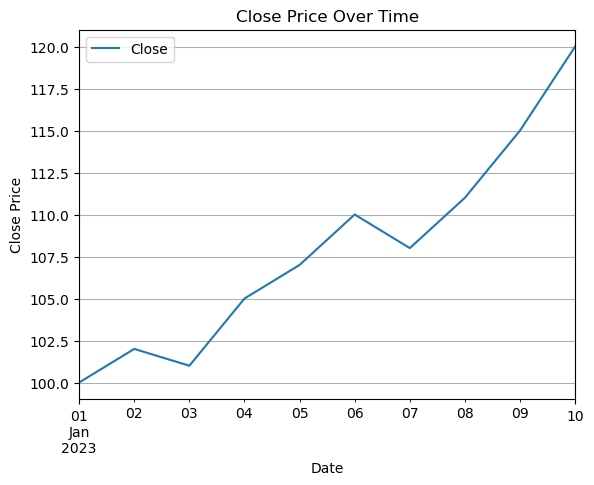

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (assuming 'Close' is a column in your DataFrame)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Close': [100, 102, 101, 105, 107, 110, 108, 111, 115, 120]
}
df_cc = pd.DataFrame(data)
df_cc.set_index('Date', inplace=True)

# Plotting the line graph
df_cc.plot.line(y='Close', use_index=True)
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

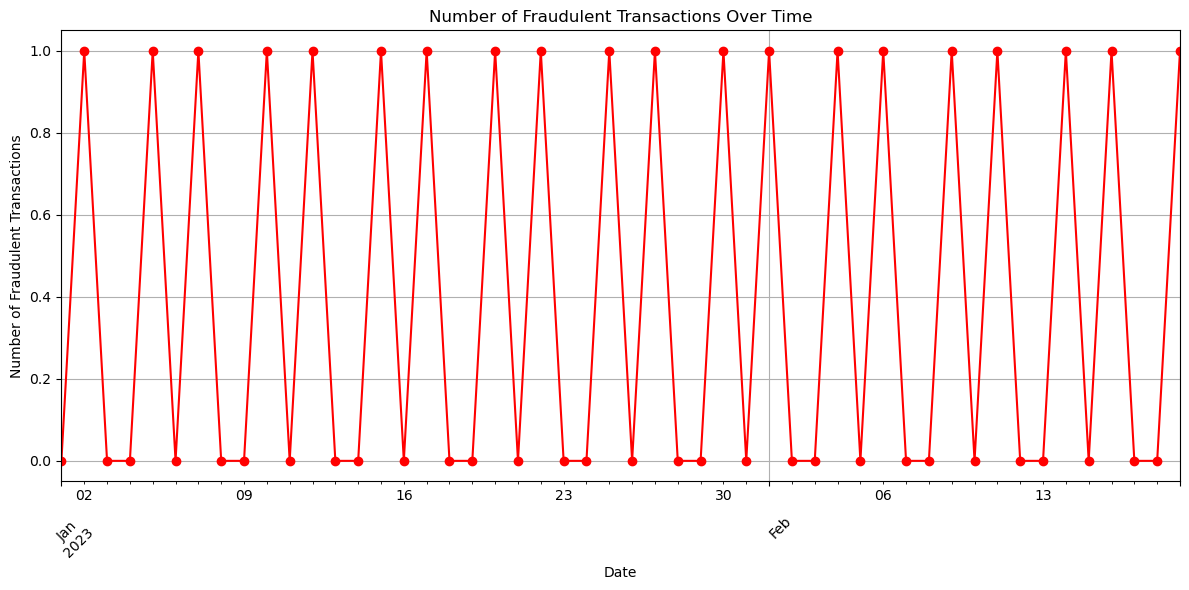

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
data = {
    'Date': pd.date_range(start='2023-01-01', periods=50),
    'Amount': [50, 20, 30, 100, 200, 150, 300, 20, 100, 40] * 5,
    'Fraudulent': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1] * 5  # 1 indicates fraud, 0 indicates legitimate
}
df = pd.DataFrame(data)

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group by date and sum fraudulent transactions
fraud_counts = df.groupby(df.index).sum()['Fraudulent']

# Plotting the graph
plt.figure(figsize=(12, 6))
fraud_counts.plot(kind='line', marker='o', color='red')
plt.title('Number of Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()